# 청물포 21기 데이터 사이언스 (10월 20일 수요일)
##### Numpy 기초, 수치형 변수 & 탐색적 데이터 분석

## 1. Numpy 기초

### Numpy란?
#### * 다차원 배열을 효과적으로 처리할 수 있도록 도와주는 도구
#### * 현실 세계의 다양한 데이터는 배열 형태로 표현할 수 있음
#### * Python의 기본 List에 비해 빠르고 강력한 기능을 제공

### Numpy의 차원
#### * 1차원 축(행) : axis 0 -> Vector
#### * 2차원 축(열) : axis 1 -> Matrix
#### * 3차원 축(채널) : axis 2 -> Tensor(3차원 이상)

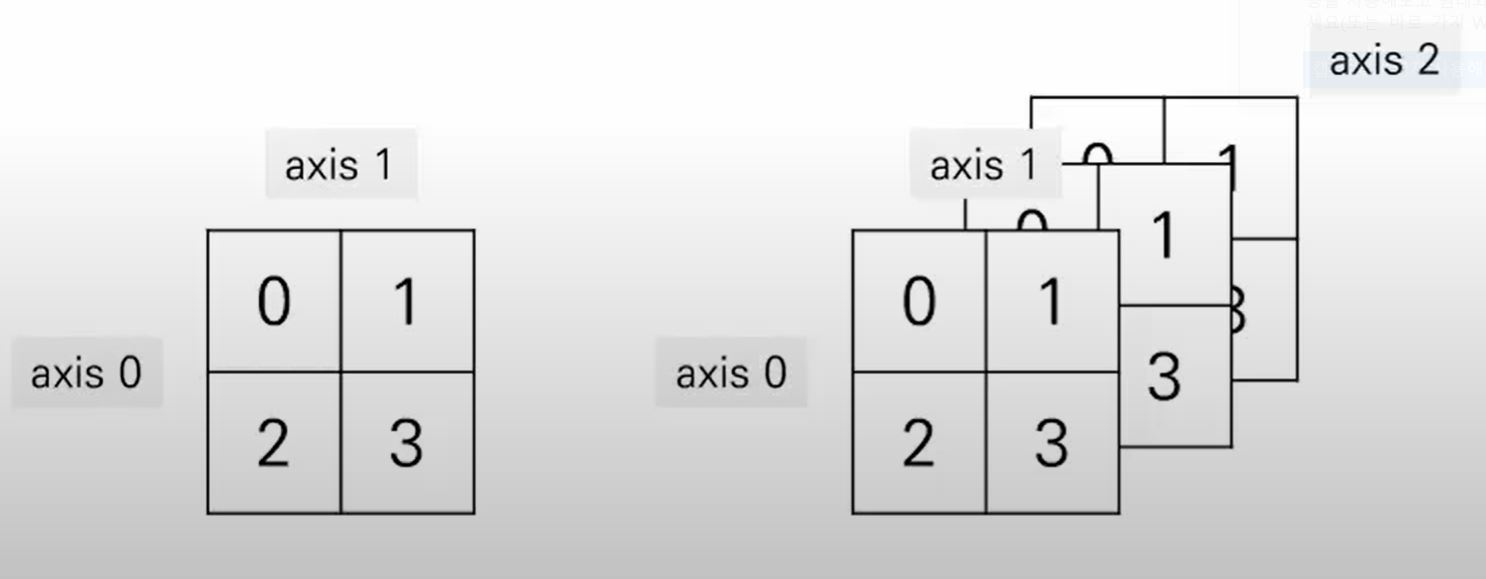

#### 출처 : Youtube 동빈나

In [2]:
import numpy as np

In [3]:
list1 = [1,2,3]
array = np.array(list1)

print(array.size)
print(array.dtype)
print(array[2])

3
int64
3


In [7]:
# 0부터 3까지의 배열 만들기

array1 = np.arange(4)
print(array1)

array2 = np.zeros((4,4),dtype=float)
print(array2)

array3 = np.ones((3,3), dtype=str)
print(array3)

[0 1 2 3]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[['1' '1' '1']
 ['1' '1' '1']
 ['1' '1' '1']]


In [8]:
# 0부터 9까지 랜덤하기 : 초기화된 배열 만들기
array4 = np.random.randint(0,10, (3,3))
print(array4)

# 평균이 0이고, 표준편차가 1인 표준 정규를 띄는 배열
array5 = np.random.normal(0,1,(3,3))
print(array5)

[[3 7 6]
 [6 2 5]
 [2 0 7]]
[[ 0.46996297  0.40909497 -1.50733904]
 [-0.76921056 -0.12899117  0.93898093]
 [-0.3833326   2.46022059  1.23815363]]


In [12]:
array6 = np.array([1,2,3])
array7 = np.array([4,5,6])
array8 = np.concatenate([array6, array7]) # 배열에 감싸서 넣어주기

print(array8)
print(array8.shape)

[1 2 3 4 5 6]
(6,)


In [13]:
# Numpy 배열 형태 바꾸기

array9 = np.array([1,2,3,4])
array10 = array9.reshape((2,2))

print(array10)
print(array10.shape)

[[1 2]
 [3 4]]
(2, 2)


In [14]:
array11 = np.arange(4).reshape(1,4)
array12 = np.arange(8).reshape(2,4)

print(array11)
print(array12)

array13 = np.concatenate([array11, array12], axis=0)
print(array13)

[[0 1 2 3]]
[[0 1 2 3]
 [4 5 6 7]]
[[0 1 2 3]
 [0 1 2 3]
 [4 5 6 7]]


In [16]:
# Numpy 배열 나누기

array14 = np.arange(8).reshape(2,4)
left, right = np.split(array14, [2], axis=1)

print(array14)
print(left.shape)
print(right.shape)
print(right[1][1])

[[0 1 2 3]
 [4 5 6 7]]
(2, 2)
(2, 2)
7


## 2. 수치형 변수 & 탐색적 데이터 분석
## EDA (Exploratory Data Analysis)

### 기본적인 탐색적 자료 분석 순서
#### 1. 데이터 임포트 (Import)
#### 2. 데이터 모양 확인
#### 3. 데이터 타입 확인
#### 4. 데이터 Null값 확인
#### 5. 종속변수의 분포 살펴보기
#### 6. 독립변수 - 명목형 변수의 분포 확인
#### 7. 독립변수 - 수치형 변수의 분포 확인
#### 8. 수치형, 명목형 변수간의 관계 파악

#### 1. 데이터 임포트 (Import)

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
filename = '/content/drive/MyDrive/titanic.csv'
titanic = pd.read_csv(filename)

#### 2. 데이터 모양 확인

In [21]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 3. 데이터 타입 확인

In [22]:
titanic.info()
# 특이한 점을 한번 찾아보세요.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
titanic['Survived'] = titanic['Survived'].astype(object)
titanic['Pclass'] = titanic['Pclass'].astype(object)

In [24]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


#### 4. 데이터 Null값 확인

In [25]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
missing_df = titanic.isnull().sum().reset_index()
missing_df.columns = ['column', 'count']
missing_df['ratio'] = missing_df['count'] / titanic.shape[0]
missing_df.loc[missing_df['ratio'] != 0]

,column,count,ratio
10,Cabin,687,0.771044
11,Embarked,2,0.002245


In [ ]:
# Null 값이 있는 경우, 2가지 방법으로 나눌 수 있다.
# 1번 방법 : 크게 그 값을 빼고 할 것 (Complete Data Analysis)
# 2번 방법 : 결측치를 대치 (Imputation)

#### 5. 종속변수의 분포 살펴보기

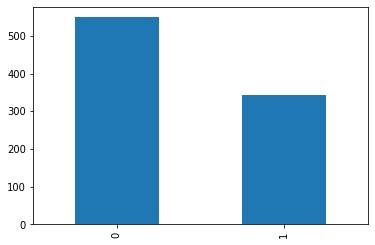

In [27]:
titanic['Survived'].value_counts().plot(kind='bar')
plt.show()

#### 6. 독립변수 - 명목형 변수의 분포 확인

In [32]:
# 단변수 탐색

category_feature = [col for col in titanic.columns if titanic[col].dtypes == "object"]
category_feature

['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

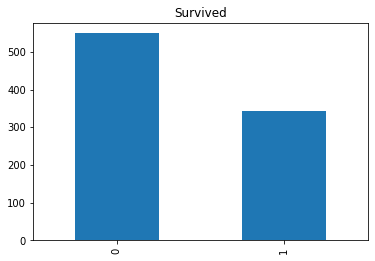

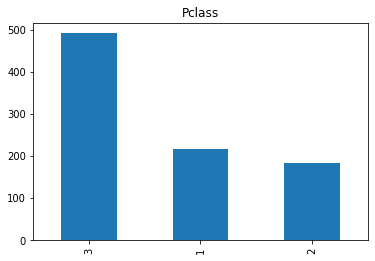

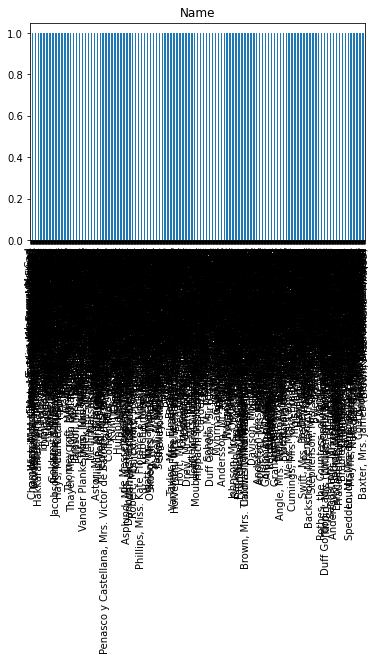

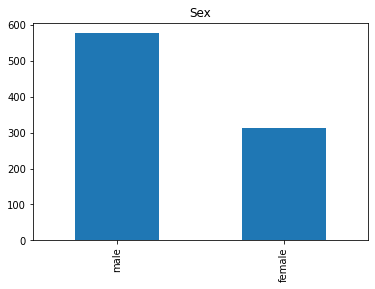

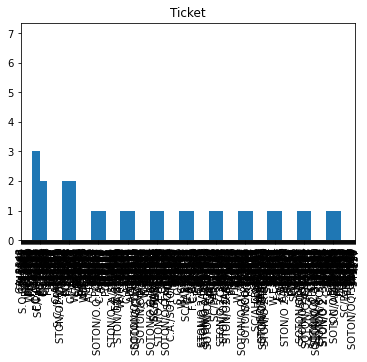

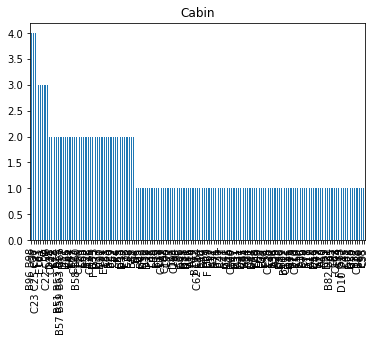

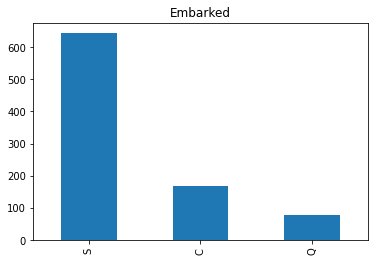

In [33]:
# 명목형 변수의 분포 파악 (그래프)

for col in category_feature :
    titanic[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()


##### 이렇게 살펴보면서 명목형 변수를 어떻게 다룰지 판단 가능
##### ex. 카테고리의 수가 너무 많거나, 종속변수와 관련 없어보이는 독립 변수들은 빼고 분석하는게 나을 수도 있다.

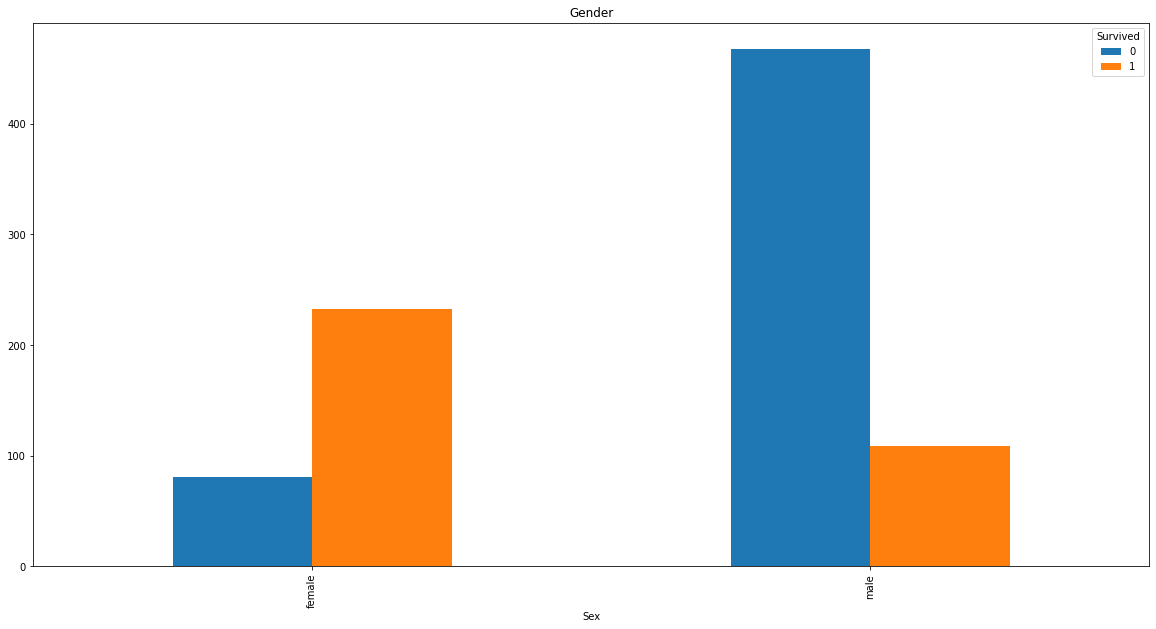

In [34]:
# 이변수 탐색

gender_df = titanic.groupby(['Sex', 'Survived'])['Survived'].count().unstack('Survived')
gender_df.plot(kind='bar', figsize=(20,10))
plt.title('Gender')
plt.show()

#### 7. 독립변수 - 수치형 변수의 분포 확인

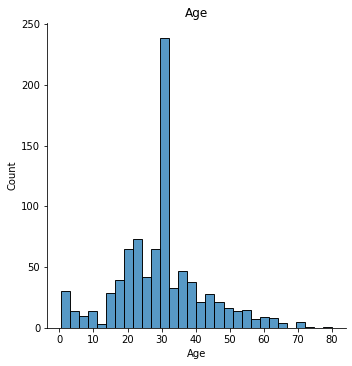

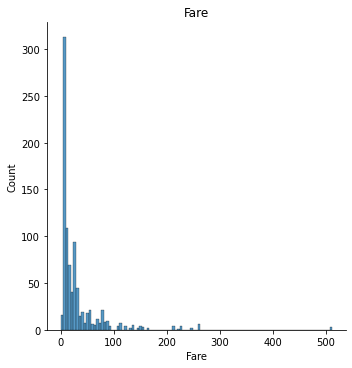

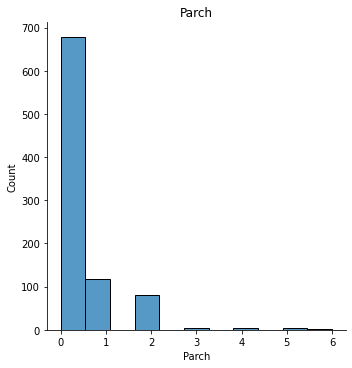

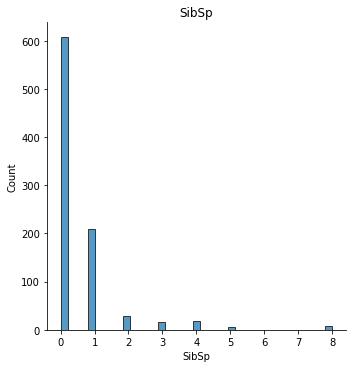

In [35]:
# 단변수 탐색
# 주로 Seaborn, Displot 함수 사용

numerical_feature = list(set(titanic.columns) - set(category_feature) - set(['PassengerId', 'Survived']))
numerical_feature = np.sort(numerical_feature)
numerical_feature

for col in numerical_feature :
    sns.displot(titanic.loc[titanic[col].notnull(), col])
    plt.title(col)
    plt.show()


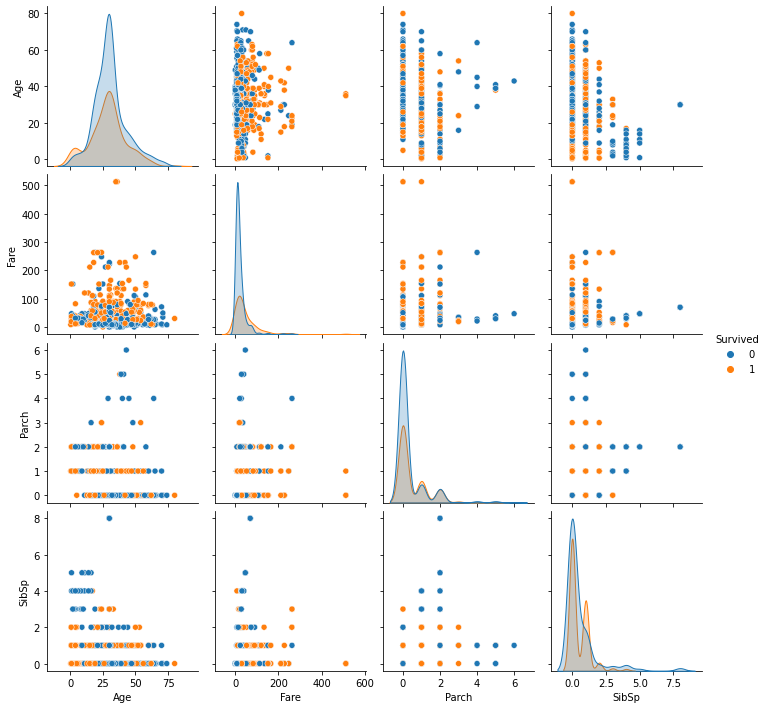

In [36]:
# 이변수, 삼변수 탐색
# Seaborn 패키지의 Pairplot 통해 파악

sns.pairplot(titanic[list(numerical_feature) + ['Survived']], hue='Survived', x_vars=numerical_feature, y_vars = numerical_feature)
plt.show()


##### Pairplot으로 여러 변수의 관계를 한 번에 파악 가능
##### Hue 파라미터 : 종속변수를 지정해 세 변수의 관계를 파악할 수 있다

#### 8. 수치형, 명목형 변수간의 관계 파악

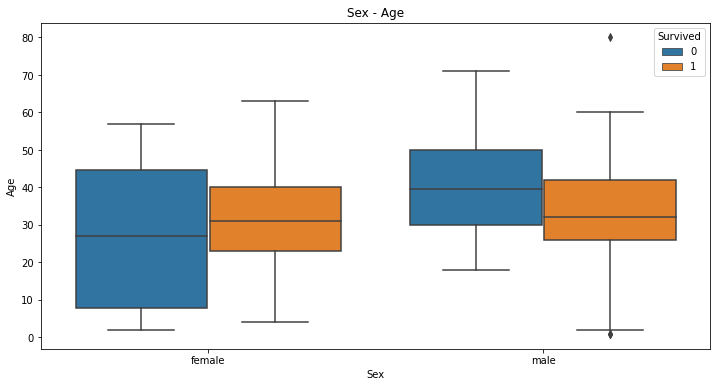

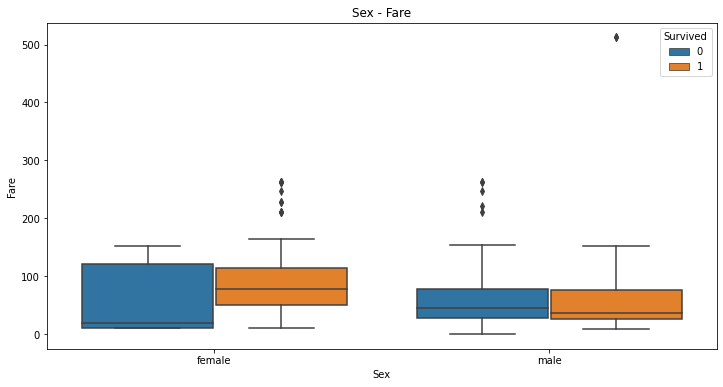

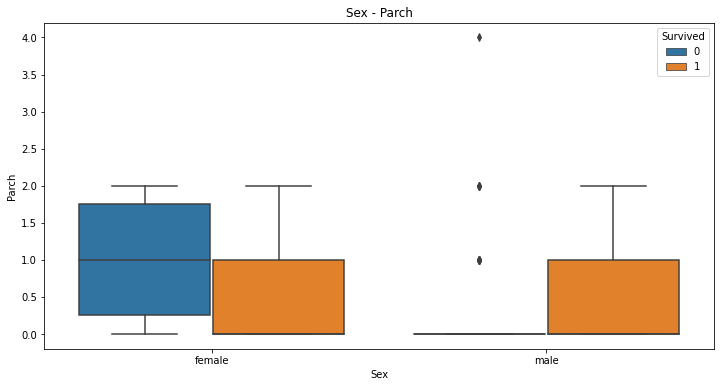

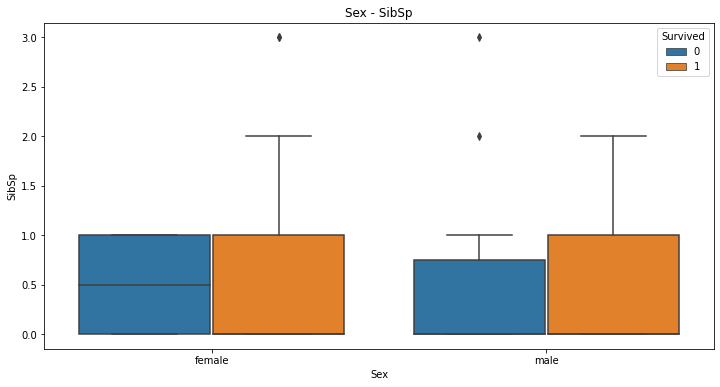

In [37]:
# 수치형 - 명목형 간의 관계 파악
# ex. 성별, 나이, 생존여부 3개의 변수를 동시에 탐색
# boxplot을 그려서 대략적인 데이터의 형태 살펴볼 수 있음

unique_list = titanic['Sex'].unique()

for col in numerical_feature :
    plt.figure(figsize=(12,6))
    sns.boxplot(x='Sex', y=col, hue='Survived', data=titanic.dropna())
    plt.title("Sex - {}".format(col))
    plt.show